In [30]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import re

In [31]:
URL = "https://om.mimuw.edu.pl/post/94"
page = requests.get(URL)
name=[]
sname=[]
yr=[]
school=[]
city=[]
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(id='content_wrapper')
finalists = results.find_all('tr')


In [32]:
for finalist in finalists: #dane finalistów
    name.append(finalist.findAll('td')[1:][0].text)
    sname.append(finalist.findAll('td')[2:][0].text)
    yr.append(finalist.findAll('td')[3:][0].text)
    school.append(finalist.findAll('td')[4:][0].text)
    city.append(finalist.findAll('td')[5:][0].text)

podzial procentowy finalistow biorac pod uwage roczniki


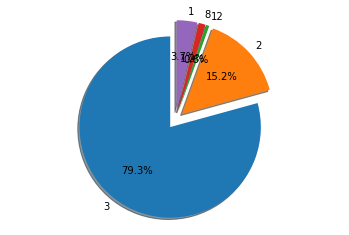

In [33]:
#tutaj robimy z tego wykresikkk
lata=set(yr)
lata=list(lata)
szkoly=set(school)
miasta=set(city)
latav=[]
expl=[]
for rok in lata:
    latav.extend([yr.count(rok)])
    expl.extend([0.1])
print('podzial procentowy finalistow biorac pod uwage roczniki')
labels = lata
sizes = latav
explode = expl

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True,startangle=90)
ax1.axis('equal')
plt.show()

In [34]:
#pobieranie miast z ładniejszej strony ale brzydko i manualnie

In [35]:
#pobieranie wojewodztw z listy okręgowych
URL='https://om.mimuw.edu.pl/post/87'
page= requests.get(URL)
soup= BeautifulSoup(page.content, 'html.parser')
results=soup.find_all('div', {'class':'second_stage_list_district_name post-title'})

In [36]:
#pobieranie miast z wikipedii (regexy pomocy)
URL='https://pl.wikipedia.org/wiki/Miasta_w_Polsce'
page= requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find_all(style='-moz-column-count:3; -webkit-column-count:3; column-count:3;')#dla kazdej litery osobno (26 pobrań) (twrzy tablicę)
cities=[]
for letter in results:
    cities+=letter.find_all('li')
data={}
pattern=re.compile('^<li>.*>([^\n<]*)</a>.*\((\S{2})\)</li>$',re.MULTILINE)
for cit in cities:
    match=re.search(pattern,str(cit))
    data.update({match.group(1):match.group(2)})


podzial procentowy finalistow na wojewodztwa


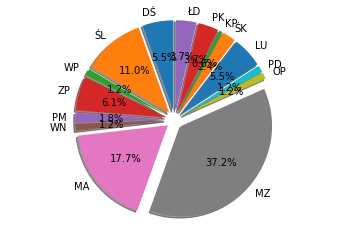

In [37]:
#dopasowanie finalistow do miasta
location=[]
for miasto in city:
    if miasto in data:
        location.append(data[miasto])
    else:
        location.append('polska B')
chartd=set(location)
chartd=list(chartd)
values=[]
boom=[]
for distr in chartd:
    values.extend([location.count(distr)])
    boom.extend([0.1])

print('podzial procentowy finalistow na wojewodztwa')
labels = chartd
sizes = values
explode = boom

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True,startangle=90)
ax1.axis('equal')

plt.show()